In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# **Data Merging**

In [2]:
dfs = []

for year in range(2011, 2016):
    for num in range(1, 5):
        try:
            df = pd.read_csv(f"A Healthcare Domain Research Problems/TexasQ{num}_{year}.csv")
            dfs.append(df)
        except FileNotFoundError:
            continue

df = pd.concat(dfs, ignore_index=True)




/tmp/ipykernel_1857890/538231451.py:6: DtypeWarning: Columns (11,12,15,16,22,39,81,82,83,84,85,86,93,95,97,99,101,227,229,230,231,232,233,234,235,237,238,239,241,243,245,247,249,251,252,253,254,255,256,263,264,265,266,267,271,273,275,277,279,281,283,295,296,297,299,300,301,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"A Healthcare Domain Research Problems/TexasQ{num}_{year}.csv")
/tmp/ipykernel_1857890/538231451.py:6: DtypeWarning: Columns (11,15,16,22,85,86,91,93,95,97,99,101,103,109,112,115,118,119,121,227,228,229,231,232,233,234,235,236,237,239,240,241,243,245,247,249,251,252,253,263,264,265,266,267,271,273,275,277,279,281,295,296,297,299,300,301,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"A Healthcare Domain Research Problems/TexasQ{num}_{year}.csv")
/tmp/ipykernel_1857890/538231451.py:6: DtypeWarning: Columns (11,12,15,16,22,39,81,82,83,84,85,86,91,93,95,97,99,101,103,227,

# **Data Cleaning**

In [8]:
#Admission type 
#input variable
print('Admission type\n',df['type_of_admission'].unique())

#Admission source 
#input variable
df = df.dropna(subset=['source_of_admission'], how='all')
df.drop(df[df['source_of_admission']=="`"].index, inplace = True)
df.drop(df[df['source_of_admission']=="D"].index, inplace = True)
df.drop(df[df['source_of_admission']=="A"].index, inplace = True)
df.loc[(df['source_of_admission'] == '0'), 'source_of_admission'] = 0
df.loc[(df['source_of_admission'] == '1'), 'source_of_admission'] = 1
df.loc[(df['source_of_admission'] == '2'), 'source_of_admission'] = 2
df.loc[(df['source_of_admission'] == '3'), 'source_of_admission'] = 3
df.loc[(df['source_of_admission'] == '4'), 'source_of_admission'] = 4
df.loc[(df['source_of_admission'] == '5'), 'source_of_admission'] = 5
df.loc[(df['source_of_admission'] == '6'), 'source_of_admission'] = 6
df.loc[(df['source_of_admission'] == '7'), 'source_of_admission'] = 7
df.loc[(df['source_of_admission'] == '8'), 'source_of_admission'] = 8
df.loc[(df['source_of_admission'] == '9'), 'source_of_admission'] = 9
df['source_of_admission'] = df['source_of_admission'].astype(int)
print('Admission source \n',df['source_of_admission'].unique())

#Count Race
#input variable
df = df.dropna(subset=['race'], how='any')
df.drop(df[df['race']=="`"].index, inplace = True)
df.loc[(df['race'] == '1'), 'race'] = 1
df.loc[(df['race'] == '2'), 'race'] = 2
df.loc[(df['race'] == '4'), 'race'] = 4
df.loc[(df['race'] == '3'), 'race'] = 3
df.loc[(df['race'] == '5'), 'race'] = 5
df['race'] = df['race'].astype(int)
print('race \n',df['race'].unique())

#Count Length Of Stay
#input variable
df = df.dropna(subset=['length_of_stay'], how='all')
df['length_of_stay'] = df['length_of_stay'].astype(int)
print('length of stay  \n',df['length_of_stay'].unique())

#Count Age
#input variable
df = df.dropna(subset=['pat_age'], how='all')
df.drop(df[df['pat_age']=="`"].index, inplace = True)
df['pat_age'] = df['pat_age'].astype(int)
print('Age Group\n',df['pat_age'].unique())

#Types of complications at admission
#input variable
print('Types of complications at admission\n',df['list_poa_disease'].unique())

#Types of complications developed during stay
#input variable
print('Types of complications developed during stay\n',df['complication_developed_count'].unique())

#Total surgeries during the stay
#input variable
print('Total surgeries during the stay\n',df['list_all_surgeries'].unique())


#Count Gender(male/women)
#control variable
df = df.dropna(subset=['sex_code'], how='all')
df.drop(df[df['sex_code']=="`"].index, inplace = True)
df.drop(df[df['sex_code']=="U"].index, inplace = True)
df['sex_code'] = df['sex_code'].dropna()
df.loc[(df['sex_code'] == "F"), 'sex_code'] = 1
df.loc[(df['sex_code'] == "M"), 'sex_code'] = 0
print('Gender\n',df['sex_code'].unique())

#Patient Status
#output variable
df = df.dropna(subset=['pat_status'], how='all')
df.drop(df[df['pat_status']=="`"].index, inplace = True)
df.loc[(df['pat_status'] == "20"), 'pat_status'] = 0
df.loc[(df['pat_status'] == "40"), 'pat_status'] = 0
df.loc[(df['pat_status'] == "41"), 'pat_status'] = 0
df.loc[(df['pat_status'] == "42"), 'pat_status'] = 0
df.loc[(df['pat_status'] != 0), 'pat_status'] = 1
print('Patient Status\n',df['pat_status'].unique())

#insert into excel
#df.to_csv("C:/Users/HulyaAlpagu/OneDrive - Saint Peters University/Desktop/A Healthcare Domain Research Problem Project/ML in High Risk/TexasQ4_2014.csv")


Admission type
 [1 2]
Admission source 
 [5 4 2 6 1 9 8 7 3 0]
race 
 [4 3 1 2 5]
length of stay  
 [   7    2   13   17    6   10   14    8   24    5    1   11    9   21
    3   18   15    4   22   12   26   19   20   32   93   23   44   16
   25   30   38   55   35   29   28   66   46   51   50   34   45   41
   67   27   63   43   79   31   71   58   64   33   80  104   68   36
   40   89   73   42  277   83  167   48   85   37   47   39   52   61
   81   57   53  335   49   56  103   77   90   78  135   60   86  101
   62   72  142   59  151  119  200   69   99   97   76   70  100   74
  117   82  191   92  165  115   87   54  182  114  141  107  180  110
  134  158  145  480  102  222   98  178   95  149  116  137   94  255
  143  337  125  121   84   96  146  150   65   88   75   91  124  404
  130  105  123  210  139  360  176  295  181  171  113  118  138  485
  131  334  189  308  109  136  243  122  132  108  128  196  241  372
  168  328  126  120  106  183  127  318  140  2

# **Finding Mean,Median&Standard Deviation for Gender:**

In [24]:

#Count Gender, AVG, Std Age for Gender(male/women)
#Gender: [0,1] 1-Female, 0-Man
#input

countFemale=0
countMan=0
listwomen_age=[]
listman_age=[]
for i in range(len(df['sex_code'])):
    if df['sex_code'][i]==1 and  df['pat_age'][i]!="" and df['pat_age'][i]!="`" :
         countFemale=countFemale+1
         listwomen_age.append(df['pat_age'][i])
      
    elif df['sex_code'][i]==0 and  df['pat_age'][i]!="" and df['pat_age'][i]!="`":
        countMan=countMan+1
        listman_age.append(df['pat_age'][i])
        
    else:
        pass
   
print('\nSex Count,Age Mean,Age Median,Age Mode\n')
print(' All Patient Count',len(df['sex_code']),'\n')
print(' Female Count',countFemale)

agedict={"01":"29-365 days ","02":"1-4 years", "03":"5-9","04":"10-14"
,"05":"15-17", "06":"18-19", "07":"20-24", "08":"25-29", "09":"30-34", "10":"35-39", "11":"40-44" 
,"12":"45-49 HIV and drug/alcohol use patients:","13":"50-54","14":"55-59","15":"60-64","16":"65-69"
,"17":"70-74","18":"75-79","19":"80-84","20":"85-89" ,"21":"90+" ,"22":"0-17" ,"23":"18-44","24":"45-64","25":"65-74","26":"75+"
 }


for i in agedict: 
  if i==str(round(np.mean(listwomen_age))):
      print(' Female Mean Age', agedict[i])
  if i==str(round(np.median(listwomen_age))):
      print(' Female Median Age', agedict[i])
  else:
     pass
 
print(' Female Standard Deviation Age',round(np.std(listwomen_age),2),'\n')
print(' Man Count',countMan)

for i in agedict: 
  if i==str(round(np.mean(listman_age))):
      print(' Man Mean Age', agedict[i])
  if i==str(round(np.median(listman_age))):
      print(' Man Median Age', agedict[i])
  else:
     pass
 
print(' Man Standard Deviation Age',round(np.std(listman_age),2),'\n')



Sex Count,Age Mean,Age Median,Age Mode

 All Patient Count 1895582 

 Female Count 994104
 Female Mean Age 70-74
 Female Median Age 70-74
 Female Standard Deviation Age 3.63 

 Man Count 901478
 Man Mean Age 65-69
 Man Median Age 70-74
 Man Standard Deviation Age 3.68 



# **The Patient's Age  And Count Was Determined Using The Group for Gender with Bars **

In [ ]:
dictage={1:"29-365 days ",2:"1-4 years", 3:"5-9","04":"10-14"
,5:"15-17", 6:"18-19", 7:"20-24", 8:"25-29", 9:"30-34", 10:"35-39", 11:"40-44" 
,12:"45-49 HIV and drug/alcohol use patients:",13:"50-54",14:"55-59",15:"60-64",16:"65-69"
,17:"70-74",18:"75-79",19:"80-84",20:"85-89" ,21:"90+" ,22:"0-17" ,23:"18-44",24:"45-64",25:"65-74",26:"75+"
 }


my_dictm = {dictage[j]:listman_age.count(i) for i in listman_age for j in dictage if i==j}
my_dictw = {dictage[j]:listwomen_age.count(i) for i in listwomen_age for j in dictage if i==j}

print("  Female Age Count",my_dictw)
print("  Men Age Count",my_dictm)

print("Female Age Count")
fig, ax = plt.subplots(1,1, figsize=(21, 2))
plt.bar(my_dictw.keys(),my_dictw.values())
plt.show()



print("Men Age Count")
fig, ax = plt.subplots(1,1, figsize=(21, 2))
plt.bar(my_dictm.keys(),my_dictm.values())
plt.show()

In [40]:
my_dictw = list(map(lambda x: x.replace('45-49 HIV and drug/alcohol use patients:', "45-49"), my_dictw))

['80-84', '70-74', '75-79', '60-64', '45-49', '65-69', '30-34', '55-59', '40-44', '35-39', '85-89', '25-29', '50-54', '20-24', '90+', '5-9', '18-19', '1-4 years', '15-17', '29-365 days ']


# **The Patient's Age And Count Was Determined Using The Group For Gender with Pie Charts**

  Female Age Count {'80-84': 107653, '70-74': 96850, '75-79': 101208, '60-64': 58622, '45-49 HIV and drug/alcohol use patients:': 23728, '65-69': 81239, '30-34': 9531, '55-59': 48815, '40-44': 16441, '35-39': 11612, '85-89': 93631, '25-29': 7580, '50-54': 35952, '20-24': 5839, '90+': 69209, '5-9': 1766, '18-19': 1828, '1-4 years': 3011, '15-17': 1654, '29-365 days ': 3593}
  Men Age Count {'50-54': 38171, '60-64': 62340, '70-74': 97215, '75-79': 93643, '55-59': 52949, '45-49 HIV and drug/alcohol use patients:': 24205, '65-69': 84051, '35-39': 10764, '85-89': 65433, '80-84': 89361, '40-44': 16047, '90+': 36816, '30-34': 8536, '25-29': 6753, '20-24': 6128, '5-9': 2088, '18-19': 2033, '1-4 years': 3516, '15-17': 1991, '29-365 days ': 4654}


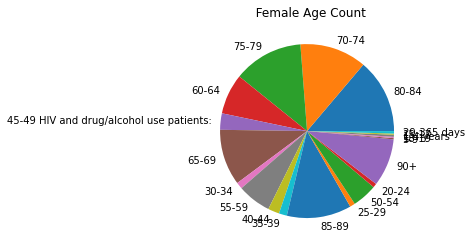

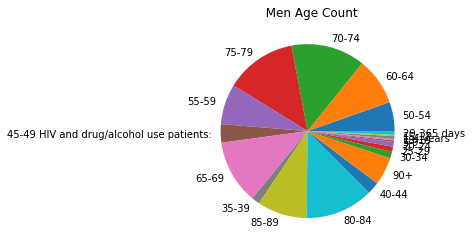

In [31]:
dictage={1:"29-365 days ",2:"1-4 years", 3:"5-9","04":"10-14"
,5:"15-17", 6:"18-19", 7:"20-24", 8:"25-29", 9:"30-34", 10:"35-39", 11:"40-44" 
,12:"45-49 HIV and drug/alcohol use patients:",13:"50-54",14:"55-59",15:"60-64",16:"65-69"
,17:"70-74",18:"75-79",19:"80-84",20:"85-89" ,21:"90+" ,22:"0-17" ,23:"18-44",24:"45-64",25:"65-74",26:"75+"
 }


my_dictm = {dictage[j]:listman_age.count(i) for i in listman_age for j in dictage if i==j}
my_dictw = {dictage[j]:listwomen_age.count(i) for i in listwomen_age for j in dictage if i==j}

print("  Female Age Count",my_dictw)
print("  Men Age Count",my_dictm)

plt.title("  Female Age Count")
plt.pie(my_dictw.values(), labels = my_dictw.keys())
plt.show() 


plt.title("  Men Age Count")
plt.pie(my_dictm.values(), labels = my_dictm.keys())
plt.show()

# **Count Race For Gender **

# **Count Female Race:**

Count Female Race:
 Female American Indian/Eskimo/Aleut 0.0
 Female Asian or Pacific Islande33sexr   0.01
 Female Black  0.16
 Female White  0.66
 Female Other 0.16 



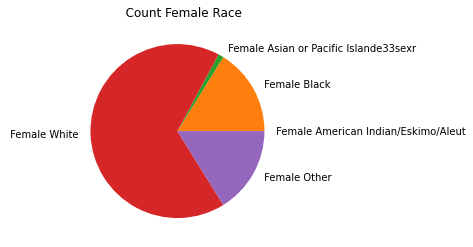

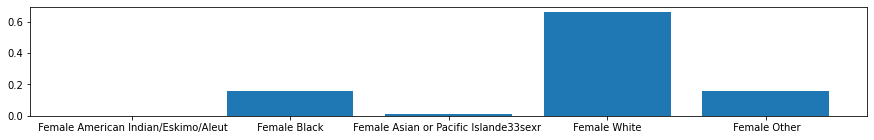

In [34]:
#Count Female Race
#input
cntallF=0
cntindianF=0
cntasianPIF=0
cntblackF=0
cntwhiteF=0
cntotherF=0
for i in range(len(df['race'])):
    if df['sex_code'][i]==1:
        cntallF+=1
        if df['sex_code'][i]==1 and df['race'][i]==1 and df['race'][i]!="" and df['race'][i]!="`" :
            cntindianF=cntindianF+1
        elif df['sex_code'][i]==1 and df['race'][i]==2 and df['race'][i]!="" and df['race'][i]!="`" :
            cntasianPIF=cntasianPIF+1
        elif df['sex_code'][i]==1 and df['race'][i]==3 and df['race'][i]!="" and df['race'][i]!="`" :
            cntblackF=cntblackF+1
        elif df['sex_code'][i]==1 and df['race'][i]==4 and df['race'][i]!="" and df['race'][i]!="`" :
            cntwhiteF=cntwhiteF+1
        elif df['sex_code'][i]==1 and df['race'][i]==5 and df['race'][i]!="" and df['race'][i]!="`" :
                cntotherF=cntotherF+1   
        else:
            pass
    else:
        pass
print('Count Female Race:')
print(' Female American Indian/Eskimo/Aleut',round(cntindianF/cntallF,2))
print(' Female Asian or Pacific Islande33sexr  ',round(cntasianPIF/cntallF,2))
print(' Female Black ',round(cntblackF/cntallF,2))
print(' Female White ',round(cntwhiteF/cntallF,2))
print(' Female Other',round(cntotherF/cntallF,2),'\n')

# Count Female Race Pie Chart

y = np.array([round(cntindianF/cntallF,2), round(cntblackF/cntallF,2), round(cntasianPIF/cntallF,2), round(cntwhiteF/cntallF,2), round(cntotherF/cntallF,2)])
mylabels = [' Female American Indian/Eskimo/Aleut', ' Female Black ', ' Female Asian or Pacific Islande33sexr  ', ' Female White ',' Female Other']

plt.title('   Count Female Race')
plt.pie(y, labels = mylabels)
plt.show() 

fig, ax = plt.subplots(1,1, figsize=(15, 2))
plt.bar(mylabels,y)
plt.show()


# **Count Men Race:**

Count Men Race:
 Men American Indian/Eskimo/Aleut  0.0
 Men Asian or Pacific Islande33sexr   0.02
 Men Black  0.13
 Men White  0.68
 Men Other 0.17 



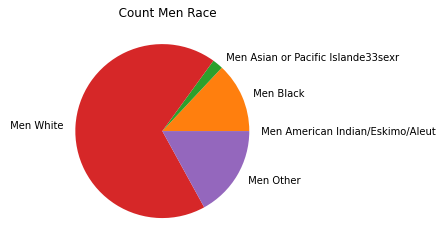

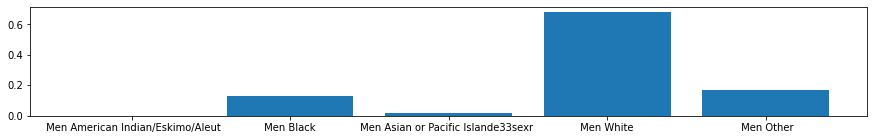

In [35]:
#Count Men Race
#input
cntallM=0
cntindianM=0
cntasianPIM=0
cntblackM=0
cntwhiteM=0
cntotherM=0
for i in range(len(df['race'])):
    if df['sex_code'][i]==0:
        cntallM+=1
        if df['sex_code'][i]==0 and df['race'][i]==1 and df['race'][i]!="" and df['race'][i]!="`" :
            cntindianM=cntindianM+1
        elif df['sex_code'][i]==0 and df['race'][i]==2 and df['race'][i]!="" and df['race'][i]!="`" :
            cntasianPIM=cntasianPIM+1
        elif df['sex_code'][i]==0 and df['race'][i]==3 and df['race'][i]!="" and df['race'][i]!="`" :
            cntblackM=cntblackM+1
        elif df['sex_code'][i]==0 and df['race'][i]==4 and df['race'][i]!="" and df['race'][i]!="`" :
            cntwhiteM=cntwhiteM+1
        elif df['sex_code'][i]==0 and df['race'][i]==5 and df['race'][i]!="" and df['race'][i]!="`" :
                cntotherM=cntotherM+1    
        else:
            pass
    else:
       pass
   
print('Count Men Race:')
print(' Men American Indian/Eskimo/Aleut ',round(cntindianM/cntallM,2))
print(' Men Asian or Pacific Islande33sexr  ',round(cntasianPIM/cntallM,2))
print(' Men Black ',round(cntblackM/cntallM,2))
print(' Men White ',round(cntwhiteM/cntallM,2))
print(' Men Other',round(cntotherM/cntallM,2),'\n')

# Count Men Race Pie Chart

y = np.array([round(cntindianM/cntallM,2), round(cntblackM/cntallM,2), round(cntasianPIM/cntallM,2), round(cntwhiteM/cntallM,2), round(cntotherM/cntallM,2)])
mylabels = [' Men American Indian/Eskimo/Aleut', ' Men Black ', ' Men Asian or Pacific Islande33sexr  ', ' Men White ',' Men Other']

plt.title('   Count Men Race')
plt.pie(y, labels = mylabels)
plt.show() 

fig, ax = plt.subplots(1,1, figsize=(15, 2))
plt.bar(mylabels,y)
plt.show()

# **Count Ethnicity For Gender**

# **Count Female Ethnicity:**

Female Count ethnicity:

 Female Hispanic Origin  151096
 Female Not of Hispanic Origin  513778 



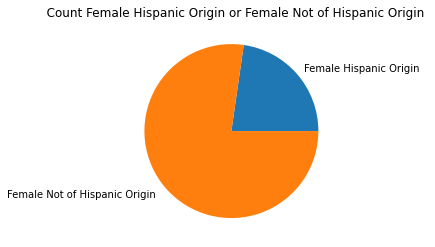

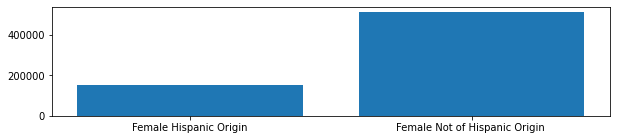

In [36]:
#Count Female ethnicity
#input

numHOF=0
numNHOF=0
for i in range(len(df['ethnicity'])):
    if df['sex_code'][i]==1:
        if df['ethnicity'][i]==1 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numHOF=numHOF+1
          
        elif df['ethnicity'][i]==2 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numNHOF=numNHOF+1
        else:
            pass
    else:
        pass

print('Female Count ethnicity:')
print('\n Female Hispanic Origin ',numHOF)
print(' Female Not of Hispanic Origin ',numNHOF,'\n')

#Count Female ethnicity Pie Chart

y = np.array([numHOF,numNHOF])
mylabels = ['Female Hispanic Origin', 'Female Not of Hispanic Origin ']

plt.title('   Count Female Hispanic Origin or Female Not of Hispanic Origin ')
plt.pie(y, labels = mylabels)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(10, 2))
plt.bar(mylabels,y)
plt.show()

# **Count Men Ethnicity:**

Men Count ethnicity:

 Men Hispanic Origin  140636
 Men Not of Hispanic Origin  466445 



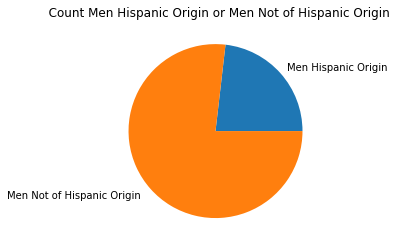

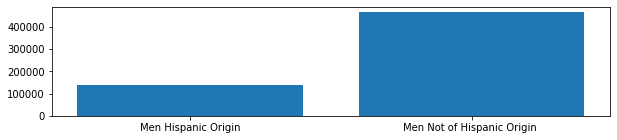

In [38]:
#Count Men ethnicity
#input

numHOM=0
numNHOM=0
for i in range(len(df['ethnicity'])):
    if df['sex_code'][i]==0:
        if df['ethnicity'][i]==1 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numHOM=numHOM+1
          
        elif df['ethnicity'][i]==2 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numNHOM=numNHOM+1
        else:
            pass
    else:
        pass

print('Men Count ethnicity:')
print('\n Men Hispanic Origin ',numHOM)
print(' Men Not of Hispanic Origin ',numNHOM,'\n')

#Count Men ethnicity Pie Chart

y = np.array([numHOM,numNHOM])
mylabels = ['Men Hispanic Origin', 'Men Not of Hispanic Origin ']

plt.title('   Count Men Hispanic Origin or Men Not of Hispanic Origin ')
plt.pie(y, labels = mylabels)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(10, 2))
plt.bar(mylabels,y)
plt.show()

# **Calculating Derived Variables**
#   
  # Types of complications at admission
#   
  # Types of complications developed during stay


In [3]:
#HOW MANY COMPLICATION DEVELOPED DURING THE STAY?
#Types Of Complications At Admission
#Types Of Complications Developed During Stay
# ("Y"=1,"N"=0 FOR poa_princ_diag_code) and (>=4000 and <=8000 =1 else 0 FOR princ_diag_code ) we used admitting_diagnosis
#input

poa_disease=['poa_princ_diag_code','poa_oth_diag_code_1','poa_oth_diag_code_2','poa_oth_diag_code_3','poa_oth_diag_code_4','poa_oth_diag_code_5','poa_oth_diag_code_6','poa_oth_diag_code_7','poa_oth_diag_code_8','poa_oth_diag_code_9','poa_oth_diag_code_10','poa_oth_diag_code_11','poa_oth_diag_code_12','poa_oth_diag_code_13','poa_oth_diag_code_14','poa_oth_diag_code_15','poa_oth_diag_code_16','poa_oth_diag_code_17','poa_oth_diag_code_18','poa_oth_diag_code_19','poa_oth_diag_code_20','poa_oth_diag_code_21','poa_oth_diag_code_22','poa_oth_diag_code_23','poa_oth_diag_code_24']
all_disease=['princ_diag_code','oth_diag_code_1','oth_diag_code_2','oth_diag_code_3','oth_diag_code_4','oth_diag_code_5','oth_diag_code_6','oth_diag_code_7','oth_diag_code_8','oth_diag_code_9','oth_diag_code_10','oth_diag_code_11','oth_diag_code_12','oth_diag_code_13','oth_diag_code_14','oth_diag_code_15','oth_diag_code_16','oth_diag_code_17','oth_diag_code_18','oth_diag_code_19','oth_diag_code_20','oth_diag_code_21','oth_diag_code_22','oth_diag_code_23', 'oth_diag_code_24']
list_all_disease={}
list_poa_disease={}
for row in range(len(df['admitting_diagnosis'])):
    poa_disease_row_sum = 0
    for column in poa_disease:
        if df[column][row] == 'Y':
            poa_disease_row_sum += 1
            
        elif df[column][row] == 'N':
            poa_disease_row_sum += 0
            
        else:
            pass
       
    all_disease_row_sum = 0
    for column in all_disease:
        if pd.isnull(df[column][row]):
             all_disease_row_sum += 0
        elif pd.notnull(df[column][row]):
             all_disease_row_sum += 1 

        if df['poa_princ_diag_code'][row] in ("Y","N") and df['poa_oth_diag_code_1'][row] in ("Y","N") and df['poa_oth_diag_code_2'][row] in ("Y","N")  and df['poa_oth_diag_code_3'][row] in ("Y","N") and df['poa_oth_diag_code_4'][row] in ("Y","N") and df['poa_oth_diag_code_5'][row] in ("Y","N")  and df['poa_oth_diag_code_6'][row] in ("Y","N") and df['poa_oth_diag_code_7'][row] in ("Y","N") and df['poa_oth_diag_code_8'][row] in ("Y","N")  and df['poa_oth_diag_code_9'][row] in ("Y","N") and df['poa_oth_diag_code_10'][row] in ("Y","N") and df['poa_oth_diag_code_11'][row] in ("Y","N")  and df['poa_oth_diag_code_12'][row] in ("Y","N") and df['poa_oth_diag_code_13'][row] in ("Y","N") and df['poa_oth_diag_code_14'][row] in ("Y","N")  and df['poa_oth_diag_code_15'][row] in ("Y","N") and df['poa_oth_diag_code_16'][row] in ("Y","N") and df['poa_oth_diag_code_17'][row] in ("Y","N")  and df['poa_oth_diag_code_18'][row] in ("Y","N") and df['poa_oth_diag_code_19'][row] in ("Y","N") and df['poa_oth_diag_code_20'][row] in ("Y","N")  and df['poa_oth_diag_code_21'][row] in ("Y","N") and df['poa_oth_diag_code_22'][row] in ("Y","N") and df['poa_oth_diag_code_23'][row] in ("Y","N")  and df['poa_oth_diag_code_24'][row] in ("Y","N") :    
           list_poa_disease.update({row:poa_disease_row_sum})
           list_all_disease.update({row:all_disease_row_sum})
        else:
             list_poa_disease.update({row:0})
             list_all_disease.update({row:0})
             
complication_developed_count = {key: list_all_disease[key] - list_poa_disease.get(key, 0)
                       for key in list_all_disease.keys()}

print('\nHOW MANY COMPLICATION DEVELOPED DURING THE STAY? \n')
print('\nTypes Of Complications At Admission','\n',list_poa_disease )
print('\nTypes Of Complications Developed During Stay','\n',complication_developed_count)

#insert to excel this column
#df.insert(0, "list_poa_disease", list_poa_disease.values())
#df.insert(0, "complication_developed_count", complication_developed_count.values())
#df.to_csv('C:/Users/HulyaAlpagu/OneDrive - Saint Peters University/Desktop/A Healthcare Domain Research Problem Project/ML in High Risk/TexasQ1_2012.csv')

Bad pipe message: %s [b'Ru$\xd1:j!\xaf\t\x9a\xe5U\xc3/8%\xcf" \xeb\x1d\xf4\x074\x83\x87\xda\'\x19<{\xd6\xce\xca\x1fe\xf1qT\x15/\xbb8\x8f\xe0\xe3_\xd2\x19\xf1\xc1\x00\x08\x13', b'\x03', b'\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127', b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\xe8\xac\xf983\x18\x8f`\xd9KFj0\x84\xa1#\x05z \xb9.\\D\x15\xcb\x0b\x10\xc5\xfc+\xc2\xbc\x0f~\xecm\xb7w\xea\xf8\xea^\x1b\x8c\x12\xd50\x1d\x7f\xc45\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x00

# **Calculating Derived Variables**
#   
  # Total surgeries during the stay
# 

In [4]:
#HOW MANY Surgeries During The Stay?
#Total Surgeries During The Stay
#input

all_surgeries=['princ_surg_proc_code','oth_surg_proc_code_1','oth_surg_proc_code_2', 'oth_surg_proc_code_3', 'oth_surg_proc_code_4', 'oth_surg_proc_code_5', 'oth_surg_proc_code_6', 'oth_surg_proc_code_7', 'oth_surg_proc_code_8', 'oth_surg_proc_code_9', 'oth_surg_proc_code_10', 'oth_surg_proc_code_11','oth_surg_proc_code_12','oth_surg_proc_code_13', 'oth_surg_proc_code_14',  'oth_surg_proc_code_15', 'oth_surg_proc_code_16', 'oth_surg_proc_code_17', 'oth_surg_proc_code_18', 'oth_surg_proc_code_19','oth_surg_proc_code_20', 'oth_surg_proc_code_21', 'oth_surg_proc_code_22', 'oth_surg_proc_code_23', 'oth_surg_proc_code_24']
list_all_surgeries={}
for row in range(len(df['princ_surg_proc_code'])):
    all_surgeries_row_sum = 0
    for column in all_surgeries:
        if pd.isnull(df[column][row]):
             all_surgeries_row_sum += 0
        elif pd.notnull(df[column][row]):
             all_surgeries_row_sum += 1
        list_all_surgeries.update({row:all_surgeries_row_sum})
        
#insert to excel this column
#df.insert(0, "list_all_surgeries", list_all_surgeries.values())
#df.to_csv('C:/Users/HulyaAlpagu/OneDrive - Saint Peters University/Desktop/A Healthcare Domain Research Problem Project/ML in High Risk/TexasQ4_2014.csv')

       
print('\n#HOW MANY Surgeries During The Stay?\n')
print('\nTotal Surgeries During The Stay\n',list_all_surgeries.values())


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



# **Count Gender for live and died**

Gender:

 Female Total 994104
 Alive Female Count 919582
 Deceased Female Count 74522
 Men Total 994104
 Alive Men Count 919582
 Deceased Men Count 74522


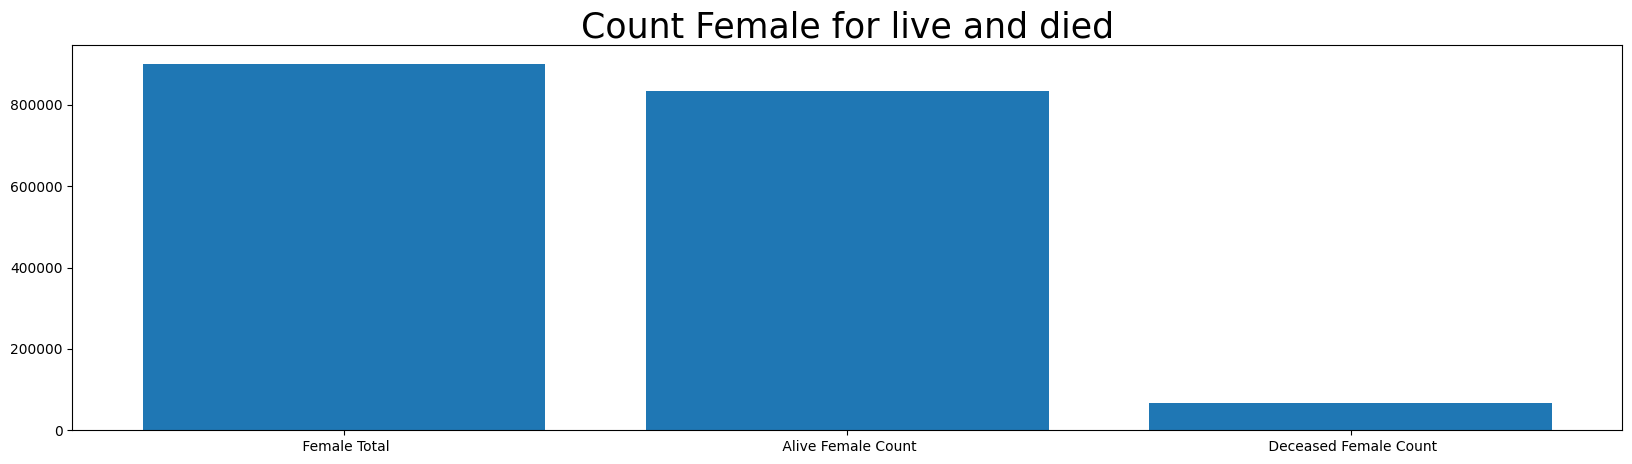

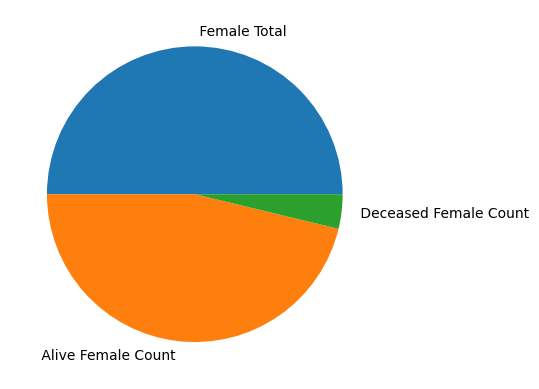

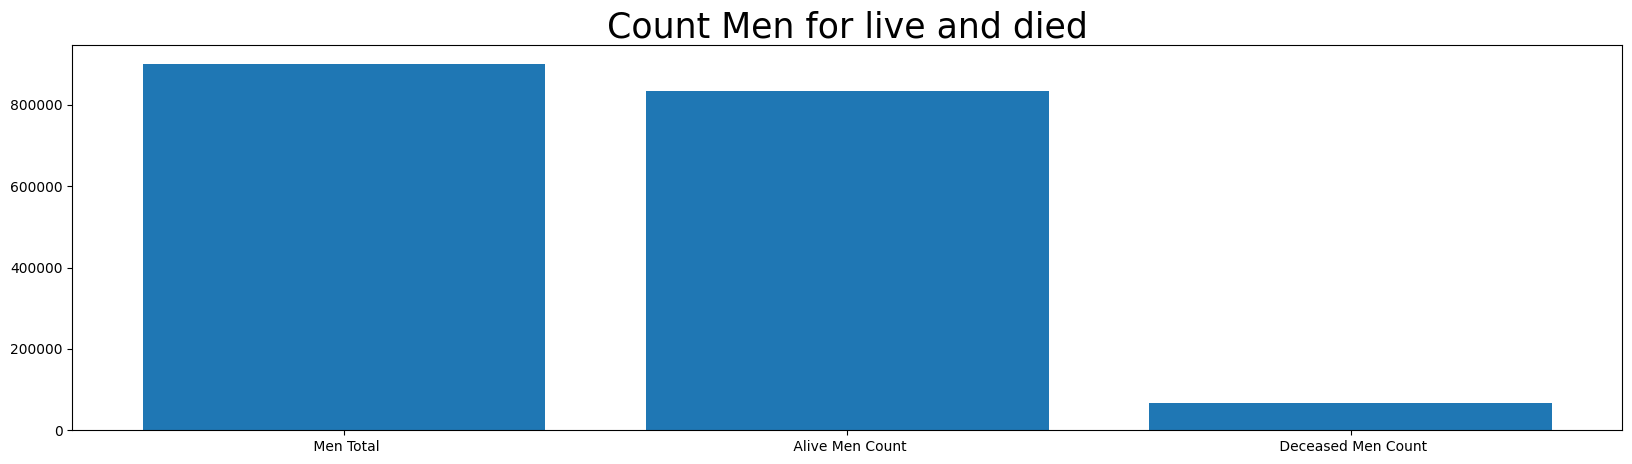

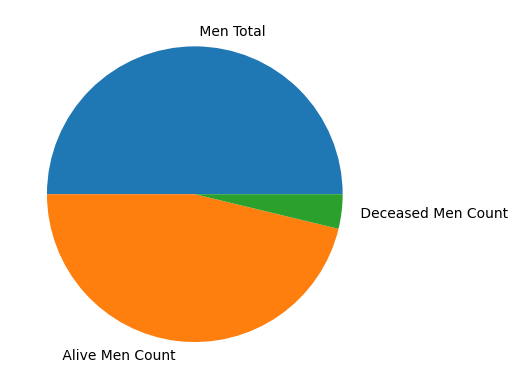

In [5]:
dfl1F = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1F=dfl1F.loc[df['sex_code'] == 1]
dfl1F = dfl1F.reset_index(drop=True)

dfl1M = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1M=dfl1M.loc[df['sex_code'] == 0]
dfl1M = dfl1M.reset_index(drop=True)

cntflive=0
cntfdied=0
cntfall=0
for i in range(len(dfl1F)):
    cntfall=cntfall+1
    if dfl1F['pat_status'][i]==0:
        cntfdied=cntfdied+1
    elif dfl1F['pat_status'][i]==1:
        cntflive=cntflive+1
    else:
        pass
print("Gender:\n")
print(" Female Total",cntfall)
print(" Alive Female Count",cntflive)
print(" Deceased Female Count",cntfdied)

cntmlive=0
cntmdied=0
cntmall=0
for i in range(len(dfl1M)):
    cntmall=cntmall+1
    if dfl1F['pat_status'][i]==0:
        cntmdied=cntmdied+1
    elif dfl1F['pat_status'][i]==1:
        cntmlive=cntmlive+1
    else:
        pass
print(" Men Total",cntfall)
print(" Alive Men Count",cntflive)
print(" Deceased Men Count",cntfdied)

yf = np.array([cntmall,cntmlive,cntmdied])
mylabels = [" Female Total"," Alive Female Count"," Deceased Female Count" ]

fig, ax = plt.subplots(1,1, figsize=(20, 5))
plt.bar(mylabels,yf)
plt.title('Count Female for live and died', fontdict={'fontsize': 25})
plt.show()

plt.pie(yf, labels = mylabels)
plt.show()

y = np.array([cntmall,cntmlive,cntmdied])
mylabels = [" Men Total"," Alive Men Count"," Deceased Men Count" ]

fig, ax = plt.subplots(1,1, figsize=(20, 5))
plt.bar(mylabels,y)
plt.title('Count Men for live and died', fontdict={'fontsize': 25})
plt.show()

plt.pie(y, labels = mylabels)
plt.show() 

# **Count Female Race for live and died**

Count Female Race: 994104
 Alive Female American Indian/Eskimo/Aleut 2665
 Deceased Female American Indian/Eskimo/Aleut 217
 Alive Female Asian or Pacific Islande33sexr   13532
 Deceased Female Asian or Pacific Islande33sexr   1259
 Alive Female Black  143875
 Deceased Female Black  10503
 Alive Female White  609317
 Deceased Female White  49603
 Alive Female Other 150193
 Deceased Female Other 12940 



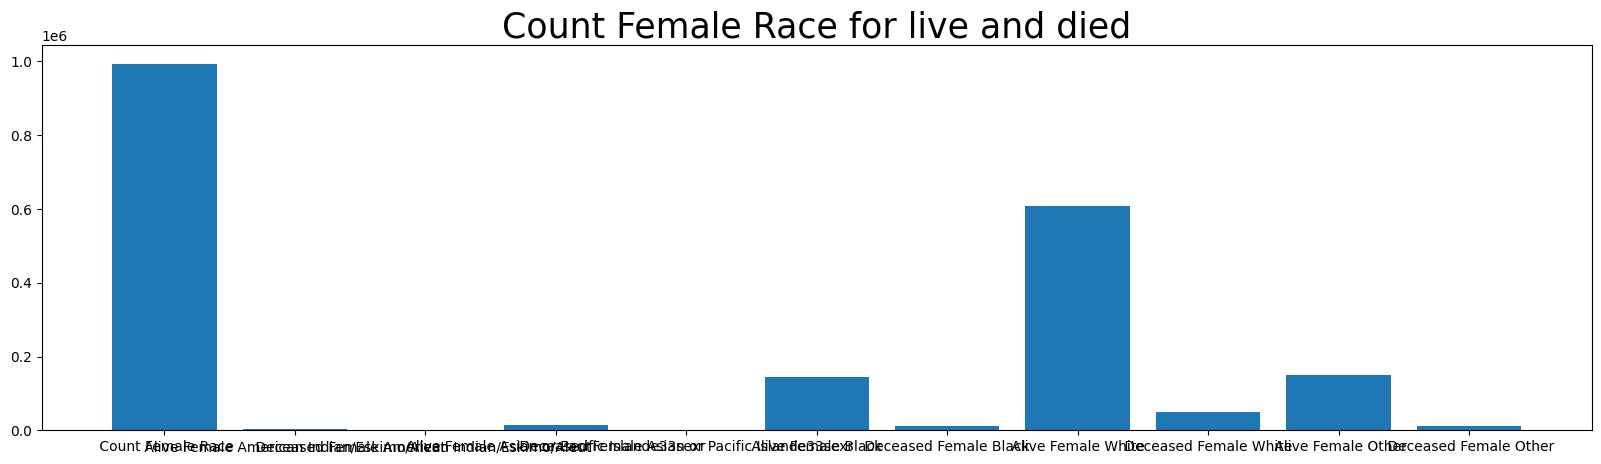

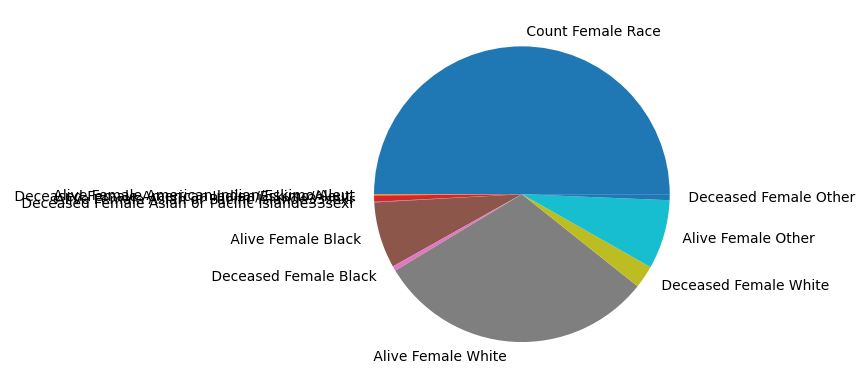

In [6]:
#Count Female Race
#input
cntallF=0
cntindianFlive=0
cntindianFdied=0
cntasianPIFlive=0
cntasianPIFdied=0
cntblackFlive=0
cntblackFdied=0
cntwhiteFlive=0
cntwhiteFdied=0
cntotherFlive=0
cntotherFdied=0

for i in range(len(df['race'])):
    if df['sex_code'][i]==1:
        cntallF+=1
        if df['sex_code'][i]==1 and df['pat_status'][i]==1 and df['race'][i]==1 and df['race'][i]!="" and df['race'][i]!="`" :
            cntindianFlive=cntindianFlive+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==0 and df['race'][i]==1 and df['race'][i]!="" and df['race'][i]!="`" :
            cntindianFdied=cntindianFdied+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==1 and df['race'][i]==2 and df['race'][i]!="" and df['race'][i]!="`" :
            cntasianPIFlive=cntasianPIFlive+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==0 and df['race'][i]==2 and df['race'][i]!="" and df['race'][i]!="`" :
            cntasianPIFdied=cntasianPIFdied+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==1 and df['race'][i]==3 and df['race'][i]!="" and df['race'][i]!="`" :
            cntblackFlive=cntblackFlive+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==0 and df['race'][i]==3 and df['race'][i]!="" and df['race'][i]!="`" :
            cntblackFdied=cntblackFdied+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==1 and df['race'][i]==4 and df['race'][i]!="" and df['race'][i]!="`" :
            cntwhiteFlive=cntwhiteFlive+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==0 and df['race'][i]==4 and df['race'][i]!="" and df['race'][i]!="`" :
            cntwhiteFdied=cntwhiteFdied+1
        elif df['sex_code'][i]==1 and df['pat_status'][i]==1 and df['race'][i]==5 and df['race'][i]!="" and df['race'][i]!="`" :
                cntotherFlive=cntotherFlive+1  
        elif df['sex_code'][i]==1 and df['pat_status'][i]==0 and df['race'][i]==5 and df['race'][i]!="" and df['race'][i]!="`" :
                cntotherFdied=cntotherFdied+1 
        else:
            pass
    else:
        pass
print('Count Female Race:',cntallF)
print(' Alive Female American Indian/Eskimo/Aleut',cntindianFlive)
print(' Deceased Female American Indian/Eskimo/Aleut',cntindianFdied)
print(' Alive Female Asian or Pacific Islande33sexr  ',cntasianPIFlive)
print(' Deceased Female Asian or Pacific Islande33sexr  ',cntasianPIFdied)
print(' Alive Female Black ',cntblackFlive)
print(' Deceased Female Black ',cntblackFdied)
print(' Alive Female White ',cntwhiteFlive)
print(' Deceased Female White ',cntwhiteFdied)
print(' Alive Female Other',cntotherFlive)
print(' Deceased Female Other',cntotherFdied,'\n')

y = np.array([cntallF, cntindianFlive, cntindianFdied, cntasianPIFlive, cntasianPIFdied,cntblackFlive,cntblackFdied,cntwhiteFlive,cntwhiteFdied,cntotherFlive,cntotherFdied])
mylabels = [' Count Female Race', ' Alive Female American Indian/Eskimo/Aleut ', ' Deceased Female American Indian/Eskimo/Aleut  ', ' Alive Female Asian or Pacific Islande33sexr ',' Deceased Female Asian or Pacific Islande33sexr ',
             ' Alive Female Black ',' Deceased Female Black ',' Alive Female White ',' Deceased Female White ',' Alive Female Other',' Deceased Female Other']

fig, ax = plt.subplots(1,1, figsize=(20, 5))
plt.bar(mylabels,y)
plt.title('Count Female Race for live and died', fontdict={'fontsize': 25})
plt.show()

plt.pie(y, labels = mylabels)
plt.show() 

# **Count Men Race for live and died**

Count Men Race: 901478
 Alive Men American Indian/Eskimo/Aleut 2338
 Deceased Men American Indian/Eskimo/Aleut 218
 Alive Men Asian or Pacific Islande33sexr   13771
 Deceased Men Asian or Pacific Islande33sexr   1456
 Alive Men Black  110963
 Deceased Men Black  8998
 Alive Men White  558568
 Deceased Men White  50887
 Alive Men Other 140620
 Deceased Men Other 13659 



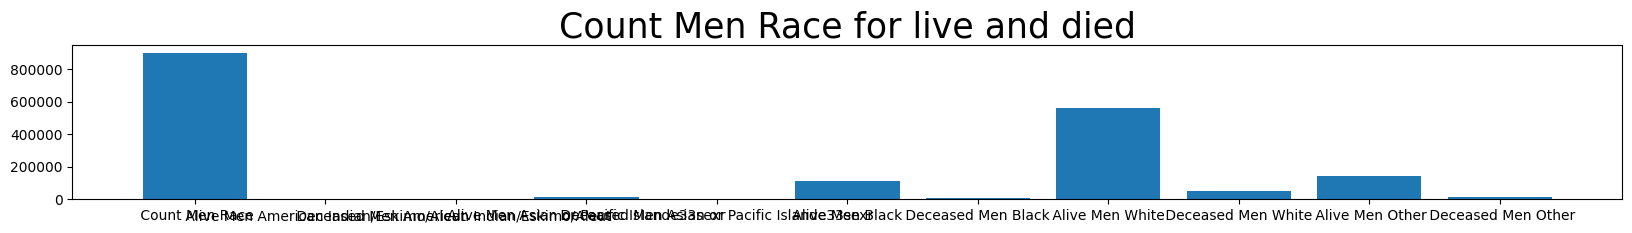

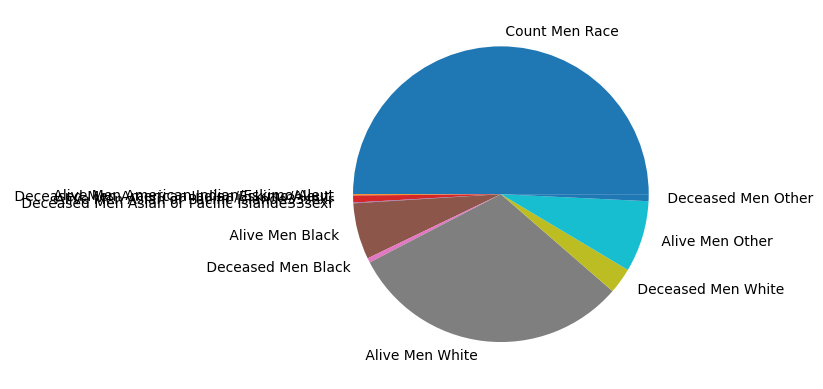

In [7]:
#Count Men Race
#input
cntallM=0
cntindianMlive=0
cntindianMdied=0
cntasianPIMlive=0
cntasianPIMdied=0
cntblackMlive=0
cntblackMdied=0
cntwhiteMlive=0
cntwhiteMdied=0
cntotherMlive=0
cntotherMdied=0

for i in range(len(df['race'])):
    if df['sex_code'][i]==0:
        cntallM+=1
        if df['sex_code'][i]==0 and df['pat_status'][i]==1 and df['race'][i]==1 and df['race'][i]!="" and df['race'][i]!="`" :
            cntindianMlive=cntindianMlive+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==0 and df['race'][i]==1 and df['race'][i]!="" and df['race'][i]!="`" :
            cntindianMdied=cntindianMdied+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==1 and df['race'][i]==2 and df['race'][i]!="" and df['race'][i]!="`" :
            cntasianPIMlive=cntasianPIMlive+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==0 and df['race'][i]==2 and df['race'][i]!="" and df['race'][i]!="`" :
            cntasianPIMdied=cntasianPIMdied+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==1 and df['race'][i]==3 and df['race'][i]!="" and df['race'][i]!="`" :
            cntblackMlive=cntblackMlive+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==0 and df['race'][i]==3 and df['race'][i]!="" and df['race'][i]!="`" :
            cntblackMdied=cntblackMdied+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==1 and df['race'][i]==4 and df['race'][i]!="" and df['race'][i]!="`" :
            cntwhiteMlive=cntwhiteMlive+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==0 and df['race'][i]==4 and df['race'][i]!="" and df['race'][i]!="`" :
            cntwhiteMdied=cntwhiteMdied+1
        elif df['sex_code'][i]==0 and df['pat_status'][i]==1 and df['race'][i]==5 and df['race'][i]!="" and df['race'][i]!="`" :
                cntotherMlive=cntotherMlive+1  
        elif df['sex_code'][i]==0 and df['pat_status'][i]==0 and df['race'][i]==5 and df['race'][i]!="" and df['race'][i]!="`" :
                cntotherMdied=cntotherMdied+1 
        else:
            pass
    else:
        pass
   
print('Count Men Race:',cntallM)
print(' Alive Men American Indian/Eskimo/Aleut',cntindianMlive)
print(' Deceased Men American Indian/Eskimo/Aleut',cntindianMdied)
print(' Alive Men Asian or Pacific Islande33sexr  ',cntasianPIMlive)
print(' Deceased Men Asian or Pacific Islande33sexr  ',cntasianPIMdied)
print(' Alive Men Black ',cntblackMlive)
print(' Deceased Men Black ',cntblackMdied)
print(' Alive Men White ',cntwhiteMlive)
print(' Deceased Men White ',cntwhiteMdied)
print(' Alive Men Other',cntotherMlive)
print(' Deceased Men Other',cntotherMdied,'\n')

y = np.array([cntallM, cntindianMlive, cntindianMdied, cntasianPIMlive, cntasianPIMdied,cntblackMlive,cntblackMdied,cntwhiteMlive,cntwhiteMdied,cntotherMlive,cntotherMdied])
mylabels = [' Count Men Race', ' Alive Men American Indian/Eskimo/Aleut ', ' Deceased Men American Indian/Eskimo/Aleut  ', ' Alive Men Asian or Pacific Islande33sexr ',' Deceased Men Asian or Pacific Islande33sexr ',
             ' Alive Men Black ',' Deceased Men Black ',' Alive Men White ',' Deceased Men White ',' Alive Men Other',' Deceased Men Other']

fig, ax = plt.subplots(1,1, figsize=(20, 2))
plt.bar(mylabels,y)
plt.title('Count Men Race for live and died', fontdict={'fontsize': 25})
plt.show()


plt.pie(y, labels = mylabels)
plt.show() 

# **Count Female Ethnicity for live and died**

Female Count ethnicity: 1493150
 Alive Female Hispanic Origin  139108
 Deceased Female Hispanic Origin  11988
 Alive Female Not of Hispanic Origin  475309
 Deceased Female Not of Hispanic Origin  38469 



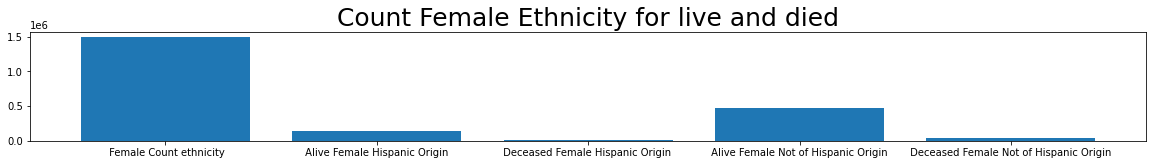

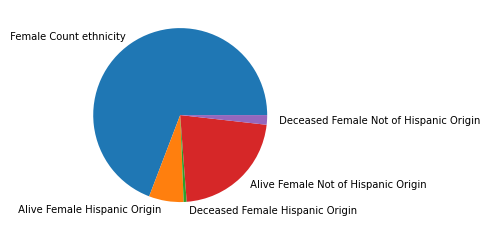

In [42]:
#Count Female ethnicity
#input
numall=0
numHOFlive=0
numHOFdied=0
numNHOFlive=0
numNHOFdied=0
for i in range(len(df['ethnicity'])):
    numall=numall+1
    if df['sex_code'][i]==1:
        if df['ethnicity'][i]==1 and df['pat_status'][i]==1 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numHOFlive=numHOFlive+1
        elif df['ethnicity'][i]==1 and df['pat_status'][i]==0 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numHOFdied=numHOFdied+1
        elif df['ethnicity'][i]==2 and df['pat_status'][i]==1 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numNHOFlive=numNHOFlive+1
        elif df['ethnicity'][i]==2 and df['pat_status'][i]==0 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numNHOFdied=numNHOFdied+1
        else:
            pass
    else:
        pass

print('Female Count ethnicity:',numall)
print(' Alive Female Hispanic Origin ',numHOFlive)
print(' Deceased Female Hispanic Origin ',numHOFdied)
print(' Alive Female Not of Hispanic Origin ',numNHOFlive)
print(' Deceased Female Not of Hispanic Origin ',numNHOFdied,'\n')

y = np.array([numall, numHOFlive, numHOFdied, numNHOFlive, numNHOFdied])
mylabels = [' Female Count ethnicity', ' Alive Female Hispanic Origin ', ' Deceased Female Hispanic Origin  ', ' Alive Female Not of Hispanic Origin ',' Deceased Female Not of Hispanic Origin ']

fig, ax = plt.subplots(1,1, figsize=(20, 2))
plt.bar(mylabels,y)
plt.title('Count Female Ethnicity for live and died', fontdict={'fontsize': 25})
plt.show()


plt.pie(y, labels = mylabels)
plt.show() 


# **Count Men Ethnicity for live and died**

Men Count ethnicity: 710385
 Alive Men Hispanic Origin:  127999
 Deceased Men Hispanic Origin:  12637
 Alive Men Not of Hispanic Origin:  427666
 Deceased Men Not of Hispanic Origin:  38779 



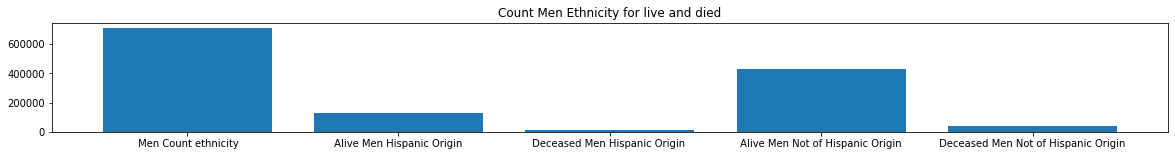

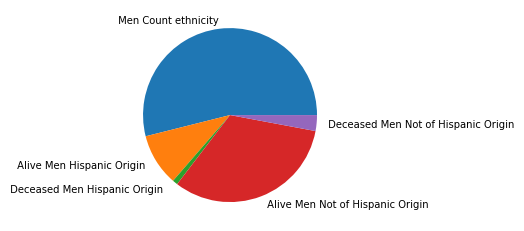

In [45]:
#Count Men ethnicity
#input
numall=0
numHOMlive=0
numHOMdied=0
numNHOMlive=0
numNHOMdied=0
for i in range(len(df['ethnicity'])):
    if df['sex_code'][i]==0:
        numall=numall+1
        if df['ethnicity'][i]==1 and df['pat_status'][i]==1 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numHOMlive=numHOMlive+1
        elif df['ethnicity'][i]==1 and df['pat_status'][i]==0 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numHOMdied=numHOMdied+1
        elif df['ethnicity'][i]==2 and df['pat_status'][i]==1 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numNHOMlive=numNHOMlive+1
        elif df['ethnicity'][i]==2 and df['pat_status'][i]==0 and df['ethnicity'][i]!="" and df['ethnicity'][i]!="`" :
            numNHOMdied=numNHOMdied+1
        else:
            pass
    else:
        pass

print('Men Count ethnicity:',numall)
print(' Alive Men Hispanic Origin: ',numHOMlive)
print(' Deceased Men Hispanic Origin: ',numHOMdied)
print(' Alive Men Not of Hispanic Origin: ',numNHOMlive)
print(' Deceased Men Not of Hispanic Origin: ',numNHOMdied,'\n')

y = np.array([numall, numHOMlive, numHOMdied, numNHOMlive, numNHOMdied])
mylabels = [' Men Count ethnicity', ' Alive Men Hispanic Origin ', ' Deceased Men Hispanic Origin  ', ' Alive Men Not of Hispanic Origin ',' Deceased Men Not of Hispanic Origin ']

fig, ax = plt.subplots(1,1, figsize=(20, 2))
plt.bar(mylabels,y)
plt.title('Count Men Ethnicity for live and died')
plt.show()

plt.pie(y, labels = mylabels)
plt.show() 



# **Count Age for live and Died**

In [3]:
listwomendied_age=[]
listwomenlive_age=[]
listmandied_age=[]
listmanlive_age=[]
for i in range(len(df['sex_code'])):
    if df['sex_code'][i]==1 and df['pat_status'][i]==0 and  df['pat_age'][i]!="" and df['pat_age'][i]!="`" :
         
         listwomendied_age.append(df['pat_age'][i])
    elif df['sex_code'][i]==1 and df['pat_status'][i]==1 and  df['pat_age'][i]!="" and df['pat_age'][i]!="`" :
         
         listwomenlive_age.append(df['pat_age'][i])
      
    elif df['sex_code'][i]==0 and df['pat_status'][i]==0 and  df['pat_age'][i]!="" and df['pat_age'][i]!="`":
        
        listmandied_age.append(df['pat_age'][i])
    
    elif df['sex_code'][i]==0 and df['pat_status'][i]==1 and  df['pat_age'][i]!="" and df['pat_age'][i]!="`":
            
            listmanlive_age.append(df['pat_age'][i])
        
    else:
        pass

dictage={1:"29-365 days ",2:"1-4 years", 3:"5-9","04":"10-14"
,5:"15-17", 6:"18-19", 7:"20-24", 8:"25-29", 9:"30-34", 10:"35-39", 11:"40-44" 
,12:"45-49 HIV and drug/alcohol use patients:",13:"50-54",14:"55-59",15:"60-64",16:"65-69"
,17:"70-74",18:"75-79",19:"80-84",20:"85-89" ,21:"90+" ,22:"0-17" ,23:"18-44",24:"45-64",25:"65-74",26:"75+"
 }


my_dictmdied = {dictage[j]:listmandied_age.count(i) for i in listmandied_age for j in dictage if i==j}
my_dictmlive = {dictage[j]:listmanlive_age.count(i) for i in listmanlive_age for j in dictage if i==j}
my_dictwdied = {dictage[j]:listwomendied_age.count(i) for i in listwomendied_age for j in dictage if i==j}
my_dictwlive = {dictage[j]:listwomenlive_age.count(i) for i in listwomenlive_age for j in dictage if i==j}

print("  Deceased Female Age Count",my_dictwdied)
print("  Alive Female Age Count",my_dictwlive)
print("  Deceased Men Age Count",my_dictmdied)
print("  Alive Men Age Count",my_dictmlive)

  Deceased Female Age Count {'65-69': 5850, '80-84': 7865, '45-49 HIV and drug/alcohol use patients:': 1720, '90+': 6355, '70-74': 6229, '85-89': 7514, '75-79': 7010, '60-64': 4969, '55-59': 4088, '50-54': 2741, '40-44': 1131, '20-24': 302, '18-19': 105, '25-29': 357, '35-39': 732, '30-34': 554, '29-365 days ': 265, '15-17': 93, '5-9': 100, '1-4 years': 182}
  Alive Female Age Count {'80-84': 99788, '70-74': 90621, '75-79': 94198, '60-64': 53653, '45-49 HIV and drug/alcohol use patients:': 22008, '65-69': 75389, '30-34': 8977, '55-59': 44727, '40-44': 15310, '35-39': 10880, '85-89': 86117, '25-29': 7223, '50-54': 33211, '20-24': 5537, '90+': 62854, '5-9': 1666, '18-19': 1723, '1-4 years': 2829, '15-17': 1561, '29-365 days ': 3328}
  Deceased Men Age Count {'75-79': 7378, '29-365 days ': 347, '70-74': 7334, '85-89': 6012, '80-84': 7485, '45-49 HIV and drug/alcohol use patients:': 1902, '60-64': 5919, '90+': 3644, '40-44': 1132, '65-69': 6564, '50-54': 3239, '55-59': 4757, '20-24': 492, 

# **Count Age for live and Died with stacked column chart **

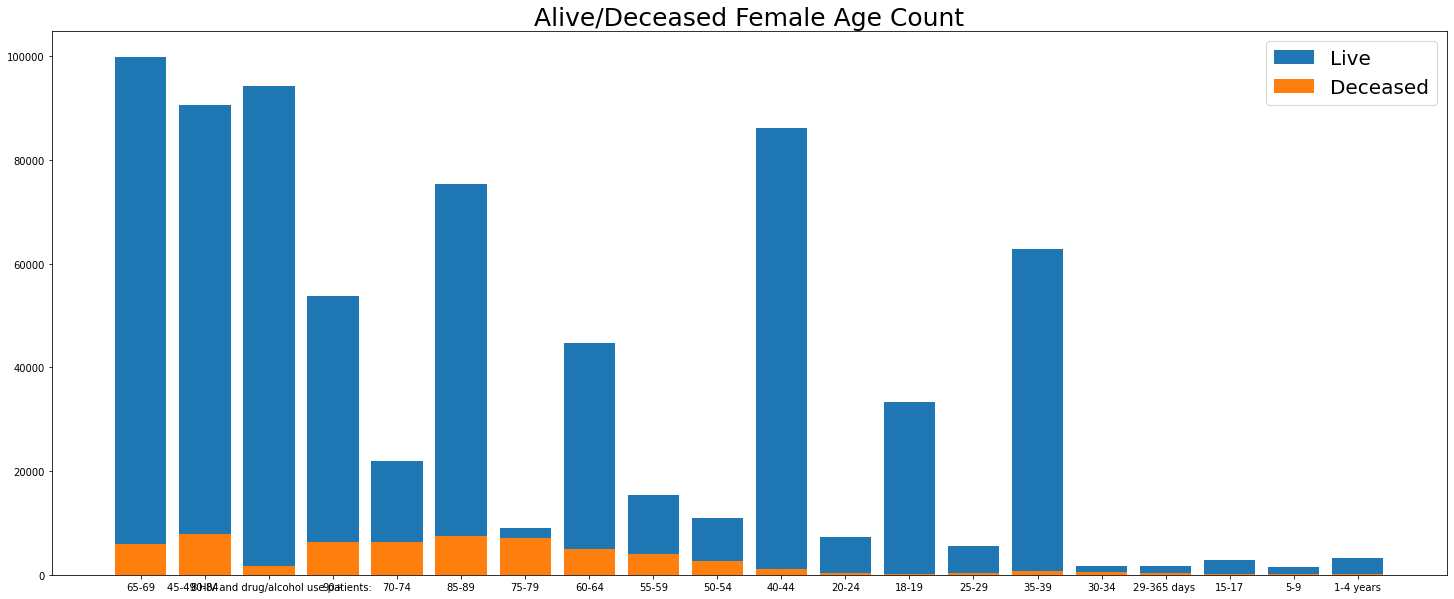

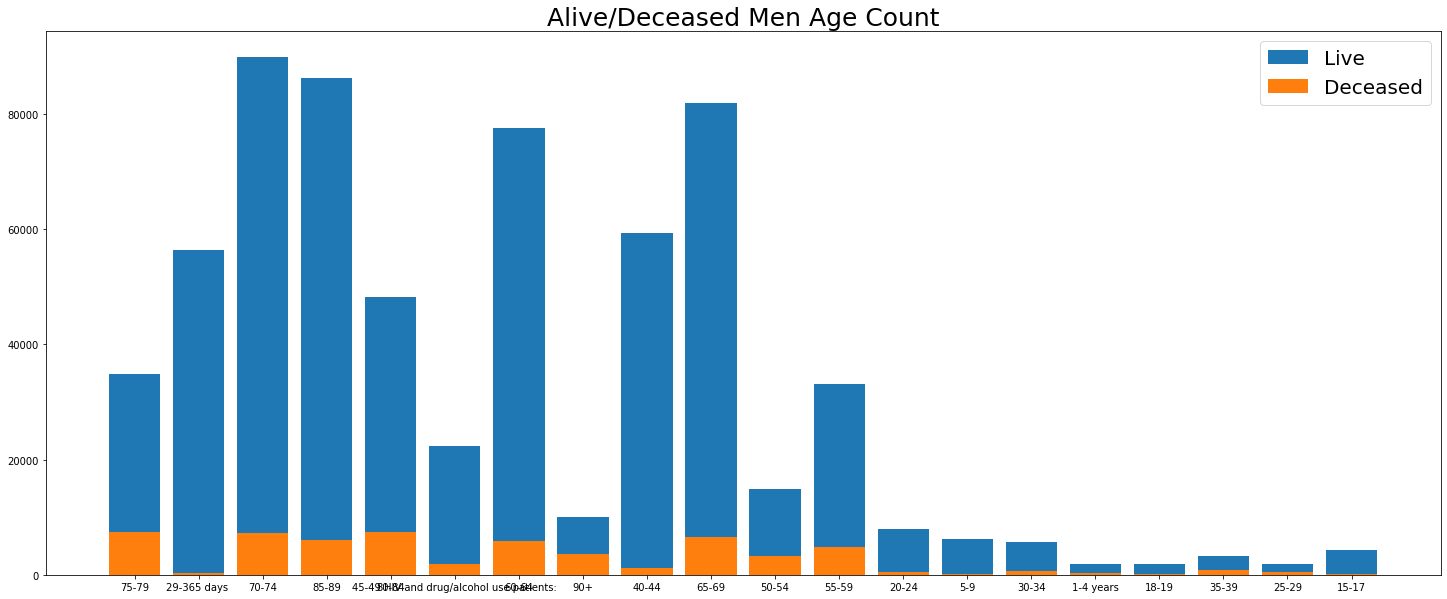

In [31]:
fig, ax = plt.subplots(1,1, figsize=(25, 10))
plt.bar(my_dictwdied.keys(),my_dictwlive.values())
plt.bar(my_dictwdied.keys(),my_dictwdied.values())
plt.legend(["Live", "Deceased"],prop={'size': 20})
plt.title('Alive/Deceased Female Age Count',fontdict={'fontsize': 25})
plt.show()

fig, ax = plt.subplots(1,1, figsize=(25, 10))
plt.bar(my_dictmdied.keys(),my_dictmlive.values())
plt.bar(my_dictmdied.keys(),my_dictmdied.values())
plt.legend(["Live", "Deceased"], prop={'size': 20})
plt.title('Alive/Deceased Men Age Count', fontdict={'fontsize': 25})
plt.show()

